In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
#from mpl_toolkits import mplot3d

In [2]:
save_plots = False

In [3]:
## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_davinci_parsed_logs/'
                  + 'event_topological_exploration/'
)
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

# Import MC data

In [4]:
inputFile = '~/data/parsedDaVinciLog.h5'
df_events = pd.read_hdf(inputFile, key='LHCbMC_Lb')

# Helper functions

In [5]:
## Rows and columns begin at 0
def Feature2DComponent(series, row, column):
    return series.map(lambda x: x[row][column])

def Feature1DComponent(series, component):
    return series.map(lambda x: x[component])

In [ ]:
#%matplotlib notebook
%matplotlib inline

In [6]:
plot3DConfig = {
    'xlabel': '$x$ [mm]',
    'ylabel': '$y$ [mm]',
    'zlabel': '$z$ [mm]',
}

# Study topology of events

Converged events:

In [ ]:
df_events.loc[df_events['status'] == 'Converged'].index

Failed events:

In [ ]:
df_events.loc[df_events['status'] == 'NonConverged'].index

In [11]:
evtIndex = 21
iterToShow = [0,1,2, 3, 4,5]
arrowLength = 250
showParticles = True
#evtIndex = df_events.loc[df_events['status'] == 'NonConverged'].index[0]
event = df_events.iloc[evtIndex]
event

seed_vtx                                          (-99.2225, -25.447, 771.43)
seed_chi2                                                                   0
seed_ci                     [[0.175677, -0.000194527, -0.00453592], [-0.00...
p_refPoint                                        (137.33, -160.569, 7754.79)
p_momentum                                       (1512.73, -870.845, 44658.2)
p_energy                                                              44702.2
p_posMomCovMatrix           [[0.00060516, 0.000172751, 0.0, -1.90223, 1.04...
pim_refPoint                                    (-827.364, -187.449, 7853.69)
pim_momentum                                      (-445.8, -73.8778, 4336.37)
pim_energy                                                            4362.08
pim_posMomCovMatrix         [[0.00964324, 0.00735905, 0.0, -0.971861, -0.1...
numberOfIterations                                                         10
iter_p_refPoint             [(11.8566, -24.2962, 771.43), (177.1

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d',
              **plot3DConfig)

if 0 in iterToShow:
    ax.scatter(*event['seed_vtx'], label='Seed vertex', color='tab:blue')
    
    if showParticles:
        ax.scatter(*event['p_refPoint'], label='Proton f.m.', color='navy')
        ax.quiver(*event['p_refPoint'], *event['p_momentum'], normalize=True,length=arrowLength, color='navy')
        ax.scatter(*event['pim_refPoint'], label='Pion f.m.', color='dodgerblue')
        ax.quiver(*event['pim_refPoint'], *event['pim_momentum'], normalize=True,length=arrowLength, color='dodgerblue')


iteration = 1
if iteration in iterToShow:
    ax.scatter(*event['iter_currentVertices'][iteration-1],
               label='It. ' + str(iteration), color='tab:orange')
    
    if showParticles:
        ax.scatter(*event['iter_p_refPoint'][iteration-1], color='darkorange')
        ax.quiver(*event['iter_p_refPoint'][iteration-1], *event['iter_p_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='darkorange')
        ax.scatter(*event['iter_pim_refPoint'][iteration-1], color='sandybrown')
        ax.quiver(*event['iter_pim_refPoint'][iteration-1], *event['iter_pim_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='sandybrown')

iteration = 2
if iteration in iterToShow:
    ax.scatter(*event['iter_currentVertices'][iteration-1],
               label='It. ' + str(iteration), color='tab:green')
    
    if showParticles:
        ax.scatter(*event['iter_p_refPoint'][iteration-1], color='darkgreen')
        ax.quiver(*event['iter_p_refPoint'][iteration-1], *event['iter_p_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='darkgreen')
        ax.scatter(*event['iter_pim_refPoint'][iteration-1], color='springgreen')
        ax.quiver(*event['iter_pim_refPoint'][iteration-1], *event['iter_pim_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='springgreen')

iteration = 3
if iteration in iterToShow:
    ax.scatter(*event['iter_currentVertices'][iteration-1],
               label='It. ' + str(iteration), color='tab:red')
    
    if showParticles:
        ax.scatter(*event['iter_p_refPoint'][iteration-1], color='tab:red')
        ax.quiver(*event['iter_p_refPoint'][iteration-1], *event['iter_p_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='tab:red')
        ax.scatter(*event['iter_pim_refPoint'][iteration-1], color='tab:red')
        ax.quiver(*event['iter_pim_refPoint'][iteration-1], *event['iter_pim_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='tab:red')

iteration = 4
if iteration in iterToShow:
    ax.scatter(*event['iter_currentVertices'][iteration-1],
               label='It. ' + str(iteration), color='tab:purple')
    
    if showParticles:
        ax.scatter(*event['iter_p_refPoint'][iteration-1], color='tab:purple')
        ax.quiver(*event['iter_p_refPoint'][iteration-1], *event['iter_p_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='tab:purple')
        ax.scatter(*event['iter_pim_refPoint'][iteration-1], color='tab:purple')
        ax.quiver(*event['iter_pim_refPoint'][iteration-1], *event['iter_pim_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='tab:purple')
    
iteration = 5
if iteration in iterToShow:
    ax.scatter(*event['iter_currentVertices'][iteration-1],
               label='It. ' + str(iteration), color='tab:brown')
    
    if showParticles:
        ax.scatter(*event['iter_p_refPoint'][iteration-1], color='tab:brown')
        ax.quiver(*event['iter_p_refPoint'][iteration-1], *event['iter_p_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='tab:brown')
        ax.scatter(*event['iter_pim_refPoint'][iteration-1], color='tab:brown')
        ax.quiver(*event['iter_pim_refPoint'][iteration-1], *event['iter_pim_momentum'][iteration-1],
                  normalize=True, length=arrowLength, color='tab:brown')


#plt.legend()
plt.title("Topologies: event " + str(evtIndex) + " (" + event['status'].lower() + ")")
plt.show()

In [7]:
iterToColor = {
    1: 'tab:orange',
    2: 'tab:green',
    3: 'tab:red',
    4: 'tab:purple',
    5: 'tab:brown'
}

In [8]:
coordinateToComponent = {
    'x': 0,
    'y': 1,
    'z': 2
}

In [14]:
def PlotEventPlane(evtIndex, xAxis, yAxis, iterationsToPlot):
    #fig = plt.figure()
    plt.axes(xlabel=xAxis + " [mm]", ylabel=yAxis + " [mm]")
    xComponent = coordinateToComponent[xAxis]
    yComponent = coordinateToComponent[yAxis]
    
    for iteration in iterationsToPlot:
        if iteration == 0:
            plt.scatter(event['seed_vtx'][xComponent], event['seed_vtx'][yComponent], label='Seed vertex', color='tab:blue')

            if showParticles:
                plt.scatter(event['p_refPoint'][xComponent], event['p_refPoint'][yComponent], label='Proton f.m.', color='navy')
                plt.quiver(event['p_refPoint'][xComponent], event['p_refPoint'][yComponent],
                          event['p_momentum'][xComponent], event['p_momentum'][yComponent], color='navy')
                plt.scatter(event['pim_refPoint'][xComponent], event['pim_refPoint'][yComponent], label='Pion f.m.', color='dodgerblue')
                plt.quiver(event['pim_refPoint'][xComponent], event['pim_refPoint'][yComponent],
                          event['pim_momentum'][xComponent], event['pim_momentum'][yComponent], color='dodgerblue')     
        else:
            color = iterToColor[iteration]

            plt.scatter(event['iter_currentVertices'][iteration-1][xComponent],
                       event['iter_currentVertices'][iteration-1][yComponent],
                       label='It. ' + str(iteration), color=color)

            if showParticles:
                plt.scatter(event['iter_p_refPoint'][iteration-1][xComponent],
                           event['iter_p_refPoint'][iteration-1][yComponent],
                           color=color)
                plt.quiver(event['iter_p_refPoint'][iteration-1][xComponent],
                          event['iter_p_refPoint'][iteration-1][yComponent],
                          event['iter_p_momentum'][iteration-1][xComponent],
                          event['iter_p_momentum'][iteration-1][yComponent],
                          color=color)
                plt.scatter(event['iter_pim_refPoint'][iteration-1][xComponent],
                           event['iter_pim_refPoint'][iteration-1][yComponent],
                           color=color)
                plt.quiver(event['iter_pim_refPoint'][iteration-1][xComponent],
                          event['iter_pim_refPoint'][iteration-1][yComponent],
                          event['iter_pim_momentum'][iteration-1][xComponent],
                          event['iter_pim_momentum'][iteration-1][yComponent],
                          color=color)
    
    plt.grid()
    plt.title("Topologies XY: event " + str(evtIndex) + " (" + event['status'].lower() + ")")
    plt.show()

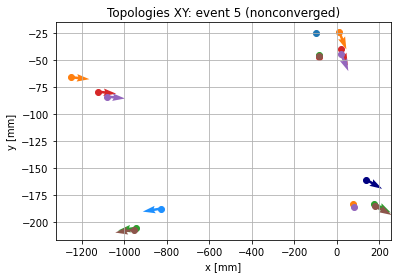

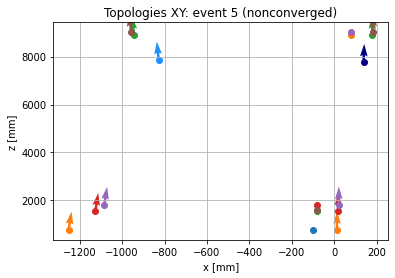

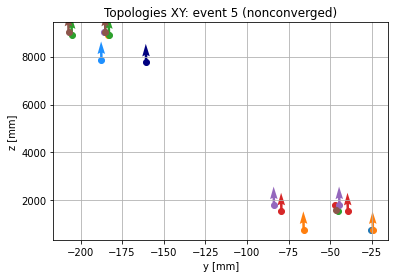

In [15]:
PlotEventPlane(5,'x','y',iterToShow)
PlotEventPlane(5,'x','z',iterToShow)
PlotEventPlane(5,'y','z',iterToShow)

In [ ]:
event['p_refPoint'][0;1]

In [ ]:
## X-Y plane
fig = plt.figure()
ax = plt.axes(xlabel='x',ylabel='y')

for iteration in iterToShow:
    if iteration == 0:
        ax.scatter(*event['seed_vtx'][:2], label='Seed vertex', color='tab:blue')

        if showParticles:
            ax.scatter(*event['p_refPoint'][:2], label='Proton f.m.', color='navy')
            ax.quiver(*event['p_refPoint'][:2], *event['p_momentum'][:2], color='navy')
            ax.scatter(*event['pim_refPoint'][:2], label='Pion f.m.', color='dodgerblue')
            ax.quiver(*event['pim_refPoint'][:2], *event['pim_momentum'][:2], color='dodgerblue')       
    else:
        color = iterToColor[iteration]
        
        ax.scatter(*event['iter_currentVertices'][iteration-1][:2],
                   label='It. ' + str(iteration), color=color)

        if showParticles:
            ax.scatter(*event['iter_p_refPoint'][iteration-1][:2], color=color)
            ax.quiver(*event['iter_p_refPoint'][iteration-1][:2], *event['iter_p_momentum'][iteration-1][:2],
                      color=color)
            ax.scatter(*event['iter_pim_refPoint'][iteration-1][:2], color=color)
            ax.quiver(*event['iter_pim_refPoint'][iteration-1][:2], *event['iter_pim_momentum'][iteration-1][:2],
                      color=color)        

#plt.legend()
plt.grid()
plt.title("Topologies XY: event " + str(evtIndex) + " (" + event['status'].lower() + ")")
plt.show()

plt.show()

In [ ]:
event['iter_p_refPoint'][1][:2]

In [ ]:
event['iter_p_refPoint'][1]